In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

file_path = "/content/drive/MyDrive/Mall_Customers.csv"
df = pd.read_csv(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [ ]:
print(df.head(5))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


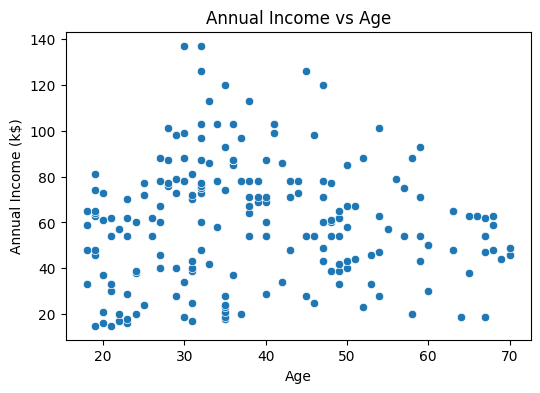

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df)
plt.title("Annual Income vs Age")
plt.show()

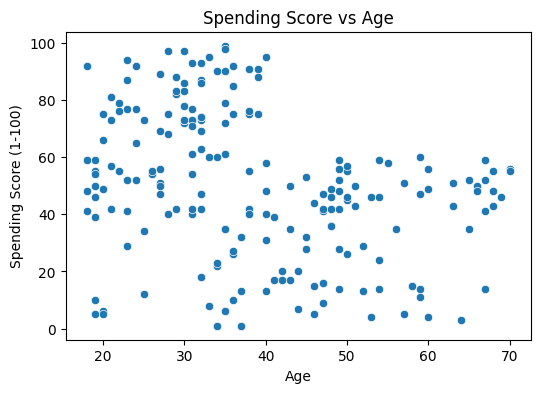

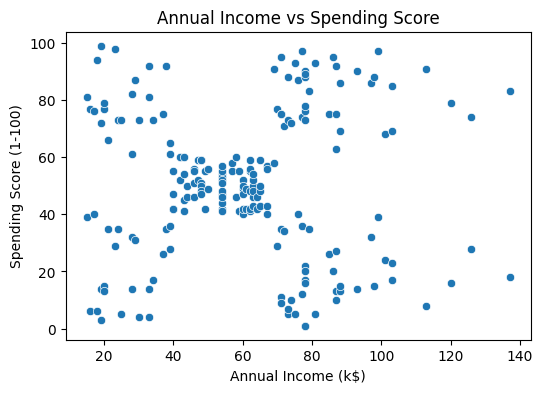

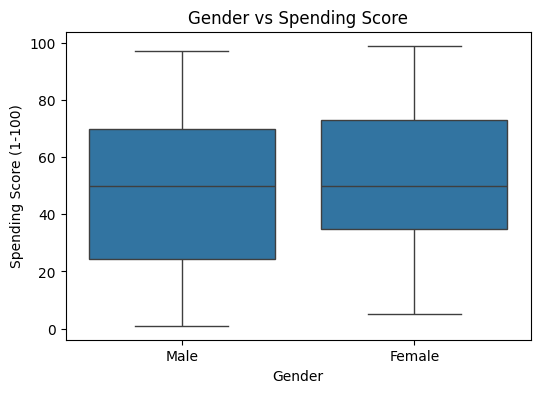

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df)
plt.title("Spending Score vs Age")
plt.show()

# 3. Annual Income vs Spending Score
plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

# 4. Gender vs Spending Score
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.title("Gender vs Spending Score")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0 (depends on data)

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Create a new DataFrame with standardized values
scaled_df = pd.DataFrame(scaled_features, columns=['Age', 'Annual Income', 'Spending Score'])

# Add Gender back if needed
scaled_df['Gender'] = df['Gender']

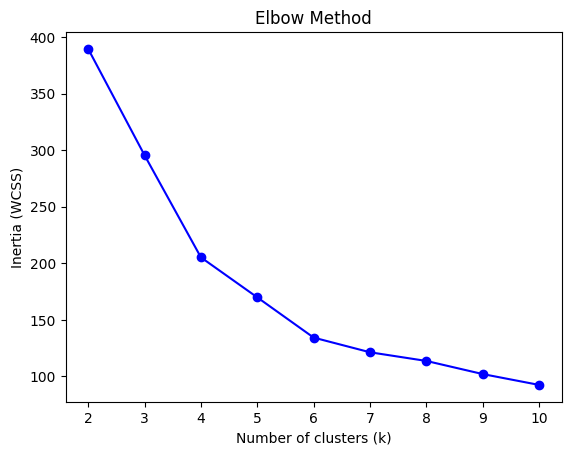

Silhouette Score: 0.410091114520974


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = scaled_df[['Age', 'Annual Income', 'Spending Score']]  # exclude Gender if testing without it

# Find optimal K using elbow method
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")
plt.show()

# Try one value of k (say k=5)
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(X)

# Add cluster labels to dataframe
scaled_df['Cluster'] = labels

# Evaluate silhouette score
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


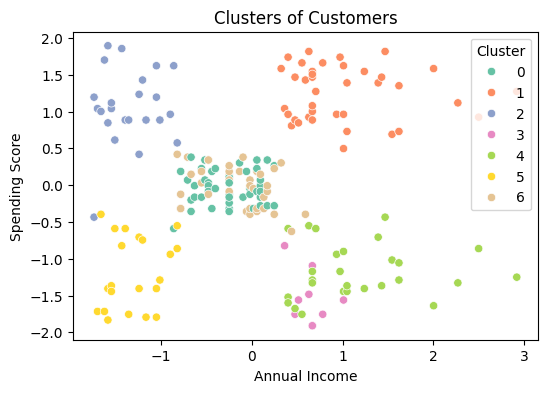

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Annual Income", y="Spending Score", hue="Cluster", data=scaled_df, palette="Set2")
plt.title("Clusters of Customers")
plt.show()


In [ ]:
# Look at cluster characteristics
print(scaled_df.groupby('Cluster')[['Age','Annual Income','Spending Score']].mean())


              Age  Annual Income  Spending Score
Cluster                                         
0        1.255265      -0.261669       -0.031587
1       -0.441917       0.991583        1.239503
2       -0.993969      -1.347348        1.064048
3       -0.818539       0.640229       -1.539059
4        0.494526       1.168946       -1.173849
5        0.478957      -1.308230       -1.196444
6       -0.842677      -0.162705       -0.020355


In [ ]:
import numpy as np

# Your cluster centers (from groupby output)
cluster_centers = np.array([
    [ 1.255265, -0.261669, -0.031587],
    [-0.441917,  0.991583,  1.239503],
    [-0.993969, -1.347348,  1.064048],
    [-0.818539,  0.640229, -1.539059],
    [ 0.494526,  1.168946, -1.173849],
    [ 0.478957, -1.308230, -1.196444],
    [-0.842677, -0.162705, -0.020355]
])

# Inverse transform using the same scaler you fitted earlier
original_centers = scaler.inverse_transform(cluster_centers)

# Put results into DataFrame for readability
clusters_df = pd.DataFrame(original_centers,
                           columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(clusters_df)


         Age  Annual Income (k$)  Spending Score (1-100)
0  56.340914           53.704540               49.386354
1  32.692310           86.538460               82.128211
2  24.999995           25.260861               77.608687
3  27.444444           77.333345               10.555561
4  45.740746           91.185189               19.962962
5  45.523806           26.285712               19.380940
6  27.108104           56.297295               49.675678


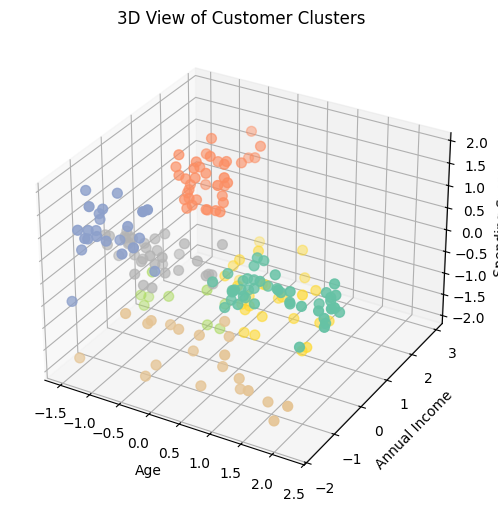

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_df['Age'], scaled_df['Annual Income'], scaled_df['Spending Score'],
           c=scaled_df['Cluster'], cmap='Set2', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title("3D View of Customer Clusters")
plt.show()


Cluster Personas

Cluster 0 → Mid-age (~56), average income (~54k), moderate spending
→ Practical buyers – stable but not extravagant.

Cluster 1 → Young (~33), high income (~87k), very high spending (~82)
→ Luxury shoppers – high purchasing power and willingness to spend.

Cluster 2 → Very young (~25), low income (~25k), high spending (~78)
→ Impulsive buyers – spend beyond their income.

Cluster 3 → Young (~27), high income (~77k), very low spending (~11)
→ Conservative earners – wealthy but cautious spenders.

Cluster 4 → Mid-age (~46), very high income (~91k), low spending (~20)
→ Affluent minimalists – rich but not interested in frequent purchases.

Cluster 5 → Mid-age (~46), low income (~26k), low spending (~19)
→ Budget-conscious – low affordability, minimal spending.

Cluster 6 → Young (~27), average income (~56k), moderate spending (~50)
→ Balanced spenders – middle-ground customers.

Business Recommendations

Luxury shoppers (Cluster 1): Premium product promotions, loyalty programs, luxury experiences.

Impulsive buyers (Cluster 2): Discounts, flash sales, trendy low-cost items.

Conservative earners (Cluster 3): Investment-related offers, premium savings plans, durable goods.

Affluent minimalists (Cluster 4): Exclusive brand partnerships, luxury memberships, limited edition items.

Budget-conscious (Cluster 5): Affordable bundles, value-for-money promotions.

Balanced spenders (Cluster 6): General promotions, seasonal offers.

Practical buyers (Cluster 0): Mid-tier products, reliability-focused marketing.